In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/BRITAVIA_DATA_CW4 (S) (2).csv", encoding='latin1', low_memory=False)
print("Shape", df.shape)
df.head(5)

Shape (103904, 27)


,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


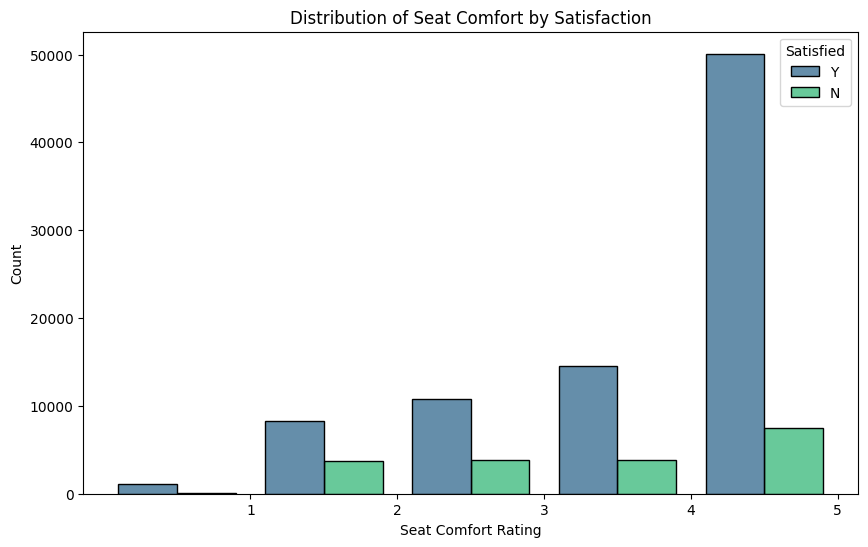

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Seat comfort', hue='Satisfied', multiple='dodge', shrink=.8, palette='viridis', bins=5)
plt.title('Distribution of Seat Comfort by Satisfaction')
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.show()

In [6]:
# Encode target
df['Satisfied_bin'] = df['Satisfied'].map({"Y":1, "N":0})
print("Null target after mapping", df['Satisfied_bin'].isna().sum())

Null target after mapping 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

In [8]:
df.shape

(103904, 28)

In [9]:
df.columns = [c.strip() for c in df.columns]
print("Dubblicated: ", df.duplicated().sum())
print("Target counts:\n", df['Satisfied'].value_counts())

Dubblicated:  0
Target counts:
 Satisfied
Y    84920
N    18984
Name: count, dtype: int64


# Data **Cleaning**

In [10]:
# Encode target
df['Satisfied_bin'] = df['Satisfied'].map({"Y":1, "N":0})
print("Null target after mapping", df['Satisfied_bin'].isna().sum())

Null target after mapping 0


In [11]:
df.isnull().sum()

,0
Ref,0
id,0
Gender,0
Satisfied,0
Age,0
Age Band,0
Type of Travel,0
Class,0
Flight Distance,0
Destination,0


/tmp/ipython-input-3966423498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfied', data=df, palette = 'viridis')


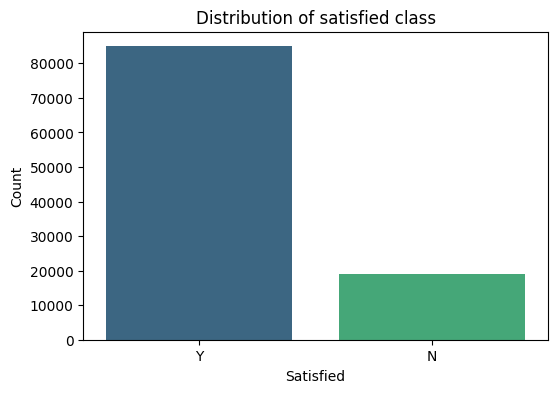

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Satisfied', data=df, palette = 'viridis')
plt.title('Distribution of satisfied class')
plt.xlabel('Satisfied')
plt.ylabel('Count')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [14]:
rating_cols = [
 'Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
 'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment',
 'On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness'
]

for c in rating_cols + ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Age"]:
  if c in df.columns:
    df[c] = pd.to_numeric(df[c], errors="coerce")

imputer = SimpleImputer(strategy="median")

num_cols = [c for c in rating_cols if c in df.columns] + ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Age"]
df[num_cols] = imputer.fit_transform(df[num_cols])

cat_cols = ["Gender", "Type of Travel", "Class", "Continent"]
for c in cat_cols:
  if c in df.columns:
    df[c] = df[c].fillna("Unknown")

print("Cleaned Nulls Left: ", df.isnull().sum().sum())



Cleaned Nulls Left:  0


In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [16]:
from sklearn.metrics import(
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report, log_loss
)

RND = 42

In [17]:
X = df[num_cols + cat_cols]
y = df["Satisfied_bin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RND)

In [18]:
X_train

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Inflight service,Cleanliness,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Age,Gender,Type of Travel,Class,Continent
92043,2.0,5.0,2.0,1.0,5.0,2.0,5.0,5.0,4.0,4.0,...,4.0,5.0,470.0,0.0,0.0,52.0,Male,Personal Travel,Eco,Europe
73666,5.0,3.0,5.0,3.0,4.0,5.0,2.0,4.0,5.0,1.0,...,2.0,4.0,4760.0,1.0,0.0,42.0,Male,Personal Travel,Eco,Asia
69008,1.0,0.0,0.0,4.0,5.0,3.0,4.0,3.0,3.0,0.0,...,3.0,4.0,1620.0,22.0,2.0,50.0,Female,Business travel,Business,Europe
28450,0.0,4.0,5.0,1.0,5.0,5.0,3.0,5.0,5.0,5.0,...,4.0,5.0,4760.0,26.0,27.0,16.0,Male,Business travel,Business,Asia
4441,4.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,1.0,...,4.0,4.0,4760.0,28.0,25.0,35.0,Female,Business travel,Eco,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80962,4.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,4.0,4.0,...,4.0,1.0,2680.0,0.0,0.0,40.0,Male,Business travel,Business,Africa
85522,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,...,5.0,5.0,4760.0,9.0,5.0,53.0,Female,Business travel,Business,Asia
6799,3.0,1.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,3.0,...,2.0,2.0,4760.0,1.0,0.0,42.0,Male,Personal Travel,Eco,Asia
72225,4.0,4.0,4.0,3.0,2.0,4.0,2.0,2.0,4.0,5.0,...,4.0,2.0,4760.0,4.0,0.0,11.0,Female,Business travel,Eco,Asia


In [19]:
X_test

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Inflight service,Cleanliness,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Age,Gender,Type of Travel,Class,Continent
5242,0.0,2.0,2.0,5.0,5.0,2.0,3.0,5.0,2.0,1.0,...,5.0,5.0,4760.0,0.0,0.0,39.0,Female,Business travel,Business,Asia
30,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,...,5.0,5.0,4760.0,0.0,0.0,31.0,Female,Business travel,Business,Asia
23077,1.0,4.0,4.0,4.0,1.0,1.0,2.0,1.0,4.0,2.0,...,3.0,1.0,4760.0,8.0,0.0,20.0,Male,Business travel,Eco,Asia
59007,0.0,3.0,3.0,4.0,5.0,3.0,5.0,5.0,3.0,1.0,...,3.0,5.0,4760.0,0.0,0.0,36.0,Male,Business travel,Business,Asia
53477,1.0,2.0,1.0,2.0,3.0,1.0,3.0,3.0,4.0,3.0,...,2.0,3.0,4760.0,47.0,59.0,30.0,Female,Business travel,Eco,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12581,3.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,...,3.0,4.0,410.0,19.0,24.0,48.0,Male,Business travel,Business,Europe
61145,3.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,2.0,...,4.0,3.0,505.0,0.0,15.0,31.0,Male,Business travel,Eco Plus,Europe
69841,1.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,...,4.0,5.0,4760.0,4.0,1.0,39.0,Female,Business travel,Business,Asia
53022,1.0,3.0,1.0,3.0,2.0,4.0,4.0,3.0,3.0,1.0,...,3.0,5.0,1610.0,0.0,1.0,63.0,Female,Personal Travel,Eco Plus,Africa


In [20]:
y_train

,Satisfied_bin
92043,1
73666,1
69008,1
28450,0
4441,1
...,...
80962,1
85522,1
6799,1
72225,0


In [21]:
y_test

,Satisfied_bin
5242,0
30,1
23077,1
59007,0
53477,0
...,...
12581,1
61145,1
69841,1
53022,1


# Data **Spliting**

In [22]:
num_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")),
                     ("scaler", StandardScaler())])
cat_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                     ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

print("Split done:", X_train.shape, X_test.shape)

Split done: (83123, 22) (20781, 22)


# **Model Building & Training**

# **Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=1000, random_state=RND))
])

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_lr))
print("AUC", roc_auc_score(y_test, y_proba_lr))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      3797
           1       0.95      0.96      0.95     16984

    accuracy                           0.92     20781
   macro avg       0.87      0.86      0.86     20781
weighted avg       0.92      0.92      0.92     20781

AUC 0.9598421715534898


# **Random Forest Traning**

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, max_depth=15, random_state=RND))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf= rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_rf))
print("AUC", roc_auc_score(y_test, y_proba_rf))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3797
           1       0.99      0.99      0.99     16984

    accuracy                           0.99     20781
   macro avg       0.98      0.98      0.98     20781
weighted avg       0.99      0.99      0.99     20781

AUC 0.996751284047909


# **Results Visulization**

In [31]:
# ---- Evaluation Function ----
def metrics_table(name, y_true, y_pred, y_proba):
    return pd.Series({
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba),
        "LogLoss": log_loss(y_true, y_proba)
    }, name=name)


In [32]:

# ---- Collect metrics for both models ----
m_lr = metrics_table("Logistic Regression", y_test, y_pred_lr, y_proba_lr)
m_rf = metrics_table("Random Forest", y_test, y_pred_rf, y_proba_rf)
summary = pd.concat([m_lr, m_rf], axis=1)
display(summary)


,Logistic Regression,Random Forest
Accuracy,0.920841,0.987489
Precision,0.946290,0.990958
Recall,0.957489,0.993759
F1,0.951857,0.992357
AUC,0.959842,0.996751
LogLoss,0.197495,0.056539


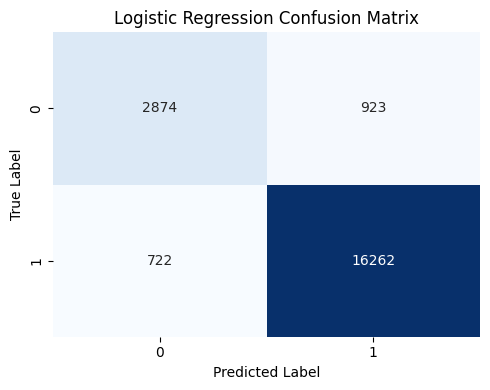

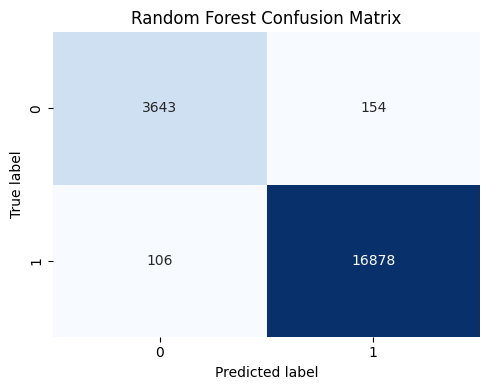

In [34]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Logistic Regression

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

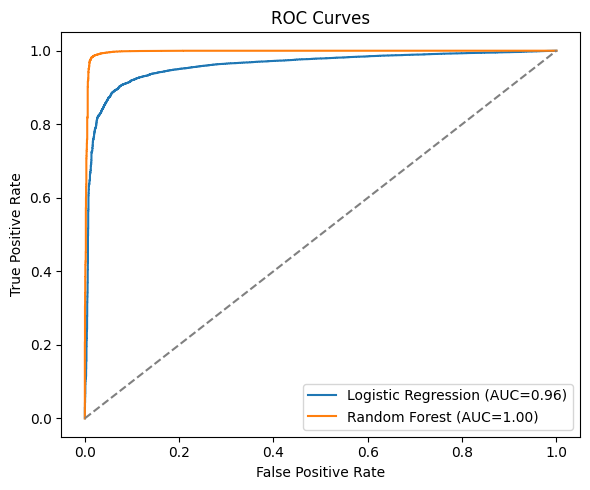

In [36]:
# ---- ROC Curves ----
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_score(y_test,y_proba_lr):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test,y_proba_rf):.2f})")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.tight_layout()
plt.show()



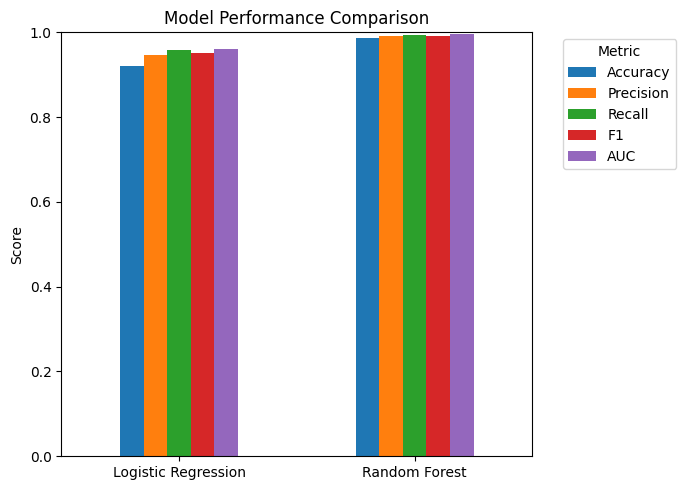

In [38]:
# ---- Bar Graph of Key Metrics ----
summary_plot = summary.T[["Accuracy","Precision","Recall","F1","AUC"]]
summary_plot.plot(kind="bar", figsize=(7,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


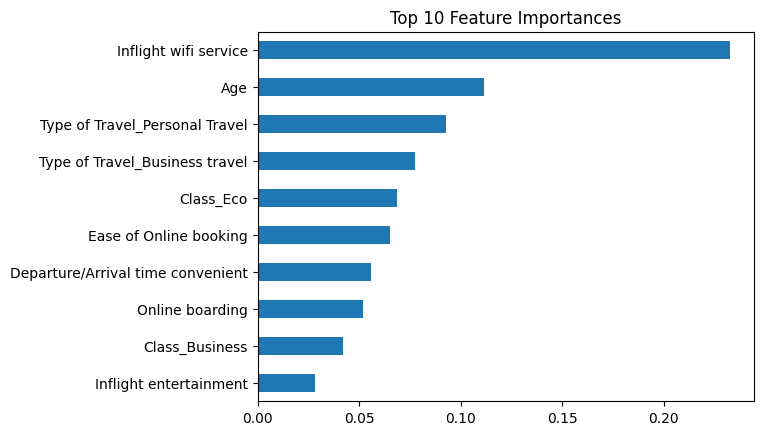

In [39]:
rf_model = rf.named_steps["model"]
ohe = rf.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
cat_names = list(ohe.get_feature_names_out(cat_cols))
all_features = num_cols + cat_names

importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False).head(10)

feat_imp.plot(kind="barh", title="Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()
